In [77]:
import numpy as np
import statistics
import statistics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima.utils import ndiffs
from statsmodels.graphics.tsaplots import acf, plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
from statsmodels.graphics.tsaplots import plot_predict
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import statsmodels.api as sm
import datetime

In [98]:
DATASETALBUMS = pd.read_csv("datasetsalbums.csv" ,sep = '\t')
DATASETARTIST = pd.read_csv("datasetsartists.csv" ,sep = '\t')
DATASETTRACKS = pd.read_csv("datasetstracks.csv" ,sep = '\t')
DATASETTRAIN_INTERACTION = pd.read_csv("datasetstrain_interactions.csv",sep = '\t')
DATASETTRAIN_PLAYLIST = pd.read_csv("datasetstrain_playlists.csv",sep = '\t')


In [3]:
DATASETALBUMS

,alid,album_uri,album_name
0,0,spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,The Cookbook
1,1,spotify:album:0z7pVBGOD7HCIB7S8eLkLI,In The Zone
2,2,spotify:album:25hVFAxTlDvXbx2X2QkUkE,Dangerously In Love (Alben für die Ewigkeit)
3,3,spotify:album:6QPkyl04rXwTGlGlcYaRoW,Justified
4,4,spotify:album:6NmFmPX56pcLBOFMhIiKvF,Hot Shot
...,...,...,...
734679,734679,spotify:album:6SOk4wEfFaeReDjgZVHgd8,Moby Dick read by Hayward Morse
734680,734680,spotify:album:6Muigto0lAY11yHT1IwRD4,A Journey to the Centre of the Earth (Jules Ve...
734681,734681,spotify:album:5n5KszdWrFsFJjCgxyL7yq,Sol y playa
734682,734682,spotify:album:2S3nz60ee9Qg1NwUG0Me0w,Quedate (Mambo Kings Remix)


In [4]:
DATASETARTIST

,arid,artist_uri,artist_name
0,0,spotify:artist:2wIVse2owClT7go1WT98tk,Missy Elliott
1,1,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears
2,2,spotify:artist:6vWDO969PvNqNYHIOW5v0m,Beyoncé
3,3,spotify:artist:31TPClRtHm23RisEBtV3X7,Justin Timberlake
4,4,spotify:artist:5EvFsr3kj42KNv97ZEnqij,Shaggy
...,...,...,...
295855,295855,spotify:artist:1hrgi9UexDilauxUQkEeR7,Leticia Dolera
295856,295856,spotify:artist:1LycqtoIlBREAi3RzKGECM,John Pariva
295857,295857,spotify:artist:3pwMDLDaW2B7vUNAAbv8M8,Hermann Melville
295858,295858,spotify:artist:0IvkFOzIGibOreT4Ez9Yyj,Eternal Classic Audio Books


In [5]:
DATASETTRACKS

,tid,arid,alid,track_uri,track_name,duration_ms
0,0,0,0,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,Lose Control (feat. Ciara & Fat Man Scoop),226863
1,1,1,1,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,Toxic,198800
2,2,2,2,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,Crazy In Love,235933
3,3,3,3,spotify:track:1AWQoqb9bSvzTjaLralEkT,Rock Your Body,267266
4,4,4,4,spotify:track:1lzr43nnXAijIGYnCT8M8H,It Wasn't Me,227600
...,...,...,...,...,...,...
2262287,2262287,93486,229637,spotify:track:2aOoiTTV0OR8DYxCk8o0JR,Forevermind - Pax217 Album Version,206400
2262288,2262288,93486,229637,spotify:track:1Uo65qTxnCg1N1X00lgcjr,Shalom - Pax217 Album Version,268266
2262289,2262289,93486,229637,spotify:track:5uEE5tii66I0cC7kZ7IMxE,Free To Be - Pax217 Album Version,334280
2262290,2262290,93486,229637,spotify:track:6A1RfnrMdxb24OYllzzTUX,Skwid - Pax217 Album Version,240453


In [6]:
DATASETTRAIN_INTERACTION

,pid,tid,pos
0,0,0,0
1,0,1,1
2,0,2,2
3,0,3,3
4,0,4,4
...,...,...,...
66346423,999999,72432,105
66346424,999999,288294,106
66346425,999999,141054,107
66346426,999999,141039,108


In [7]:
DATASETTRAIN_PLAYLIST

,pid,name,collaborative,modified_at,num_albums,num_tracks,num_followers,num_tracks.1,num_edits,duration_ms,num_artists,description
0,0,Throwbacks,False,1493424000,47,52,1,52,6,11532414,37,NaN
1,1,Awesome Playlist,False,1506556800,23,39,1,39,5,11656470,21,NaN
2,2,korean,False,1505692800,51,64,1,64,18,14039958,31,NaN
3,3,mat,False,1501027200,107,126,1,126,4,28926058,86,NaN
4,4,90s,False,1401667200,16,17,2,17,7,4335282,16,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,Praise,False,1409529600,23,32,1,32,5,8502173,11,NaN
999996,999996,Worship,False,1475625600,74,122,1,122,12,31246908,42,NaN
999997,999997,Sex,False,1498176000,22,24,1,24,4,6015165,17,NaN
999998,999998,✝️,False,1506816000,8,11,1,11,6,2909608,5,NaN


REVISAMOS VALORES NULOS

In [8]:
DATASETTRAIN_PLAYLIST.isna().sum().to_frame()
DATASETTRAIN_INTERACTION.isna().sum().to_frame()
DATASETTRACKS.isna().sum().to_frame()
DATASETALBUMS.isna().sum().to_frame()
DATASETARTIST.isna().sum().to_frame()

,0
arid,0
artist_uri,0
artist_name,4


Text(0.5, 1.0, 'CANTIDAD DE CANCIONES EN PLAYLIST ')

<Figure size 1440x720 with 0 Axes>

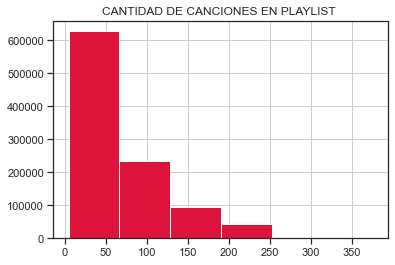

In [30]:


fig1 = plt.figure(figsize=(20,10)) 
DATASETTRAIN_PLAYLIST.hist("num_tracks", bins = 6, color = "crimson")
plt.title("CANTIDAD DE CANCIONES EN PLAYLIST " )

Text(0.5, 1.0, 'CANTIDAD DE ALBUMS EN PLAYLIST ')

<Figure size 1440x720 with 0 Axes>

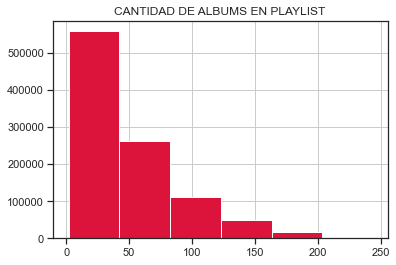

In [43]:
fig1 = plt.figure(figsize=(20,10)) 
DATASETTRAIN_PLAYLIST.hist("num_albums", bins = 6, color = "crimson")
plt.title("CANTIDAD DE ALBUMS EN PLAYLIST " )


Text(0.5, 1.0, 'CANTIDAD DE EDITS EN PLAYLIST ')

<Figure size 1440x720 with 0 Axes>

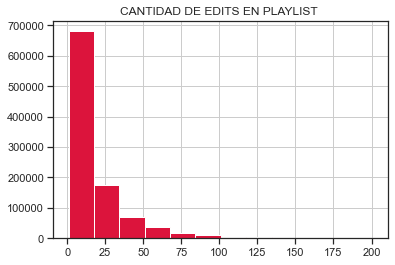

In [45]:
fig1 = plt.figure(figsize=(20,10)) 
DATASETTRAIN_PLAYLIST.hist("num_edits", bins = 12, color = "crimson")
plt.title("CANTIDAD DE EDITS EN PLAYLIST " )


Text(0.5, 1.0, 'DURACION DE TRACKS ')

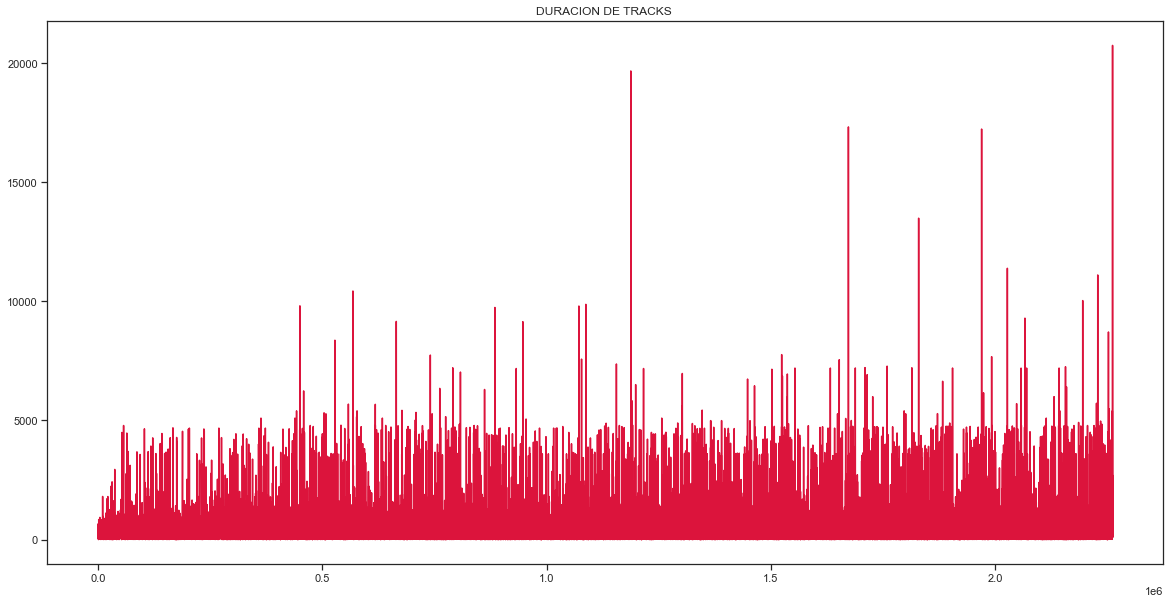

In [101]:
fig1 = plt.figure(figsize=(20,10)) 
DATASETTRACKSDIVS = DATASETTRACKS["duration_ms"].div(1000)

DATASETTRACKSDIVS.plot( color = "crimson")
plt.title("DURACION DE TRACKS " )



In [102]:
DATASETTRACKSDIVS

0          226.863
1          198.800
2          235.933
3          267.266
4          227.600
            ...   
2262287    206.400
2262288    268.266
2262289    334.280
2262290    240.453
2262291    341.933
Name: duration_ms, Length: 2262292, dtype: float64

Media duracion de track en segundos

In [96]:
statistics.median(DATASETTRACKSDIVS)

2.2528000000000006

,tid,arid,alid,track_uri,track_name,duration_ms
0,0,0,0,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,Lose Control (feat. Ciara & Fat Man Scoop),2.268630e-11
1,1,1,1,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,Toxic,1.988000e-11
2,2,2,2,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,Crazy In Love,2.359330e-11
3,3,3,3,spotify:track:1AWQoqb9bSvzTjaLralEkT,Rock Your Body,2.672660e-11
4,4,4,4,spotify:track:1lzr43nnXAijIGYnCT8M8H,It Wasn't Me,2.276000e-11
...,...,...,...,...,...,...
2262287,2262287,93486,229637,spotify:track:2aOoiTTV0OR8DYxCk8o0JR,Forevermind - Pax217 Album Version,2.064000e-11
2262288,2262288,93486,229637,spotify:track:1Uo65qTxnCg1N1X00lgcjr,Shalom - Pax217 Album Version,2.682660e-11
2262289,2262289,93486,229637,spotify:track:5uEE5tii66I0cC7kZ7IMxE,Free To Be - Pax217 Album Version,3.342800e-11
2262290,2262290,93486,229637,spotify:track:6A1RfnrMdxb24OYllzzTUX,Skwid - Pax217 Album Version,2.404530e-11
